In [1]:
## 读取数据
import pickle
import pandas as pd
file_name = r"C:\Users\deep\Desktop\PepMTL\fine_tune_data\Modeling_data.pkl"
with open(file_name, 'rb') as f:
   Data = pickle.load(f)
pd.set_option('display.max_columns', None)
Data

,Modified sequence,Charge,Length,Fragmentation,m/z,Mass,Retention time,CCS,Matches,Intensities,Masses,Intensity,Score
0,AAAAAAAAAAAAAAAGAGAGAK,3.0,22,2,532.9533,1595.8380,70.32,567.54,y3;y4;y5;y7;y8;y9;y10;y11;y12;y14;y15;b3;b4;b5...,"[0.0, 0.0, 105.8, 258.0, 447.1, 418.0, 438.4, ...","[0.0, 0.0, 214.119643974358, 285.157343718957,...",43961.0,78.86
1,AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...,3.0,52,2,1468.0429,4401.1069,84.68,840.61,y2;y3;y4;y5;y6;y7;y8;y9;y10;y12;y13;y14;y16;y1...,"[0.0, 0.0, 54.5, 163.1, 388.9, 912.3, 1266.1, ...","[0.0, 0.0, 214.117024092357, 285.155549934846,...",92636.0,63.10
2,AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...,3.0,52,2,1468.0429,4401.1069,84.68,840.61,y2;y3;y4;y5;y7;y8;y9;y10;y12;y13;y14;y16;y18;b...,"[0.0, 0.0, 17.9, 98.4, 358.1, 575.6, 1189.0, 1...","[0.0, 0.0, 214.117562639275, 285.155775087783,...",209040.0,55.18
3,AAAAAAAAAAGAAGGR,2.0,16,2,599.8180,1197.6214,32.52,397.97,y3;y4;y5;y6;y7;y8;y9;y10;y11;y12;y13;y14;y3-NH...,"[0.0, 0.0, 54.2, 108.7, 100.6, 79.9, 53.6, 49....","[0.0, 0.0, 214.118524618109, 285.156051001449,...",13071.0,143.39
4,[1]AAAAAAAAAAGAAGGR,2.0,16,2,620.8233,1239.6320,71.45,409.09,y2;y3;y4;y5;y6;y7;y8;y9;y10;y11;y12;y13;y14;y2...,"[0.0, 0.0, 624.3, 1008.1, 666.0, 456.4, 248.0,...","[0.0, 0.0, 256.129507258295, 327.166322347601,...",55383.0,151.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249816,YYVTIIDAPGHRDFIK,3.0,16,2,636.6720,1906.9941,74.40,532.57,y3;y5;y6;y7;y8;y9;y10;y11;y12;y13;y8-H2O;y9-H2...,"[0.0, 1289.3, 211.3, 175.1, 0.0, 0.0, 0.0, 0.0...","[0.0, 327.133358274998, 426.202562281217, 527....",212860.0,84.31
249817,YYYAVVDC[4]DSPETASK,2.0,16,2,934.4064,1866.7982,60.42,452.93,y3;y4;y6;y7;y8;y9;y10;y11;y12;y12-H2O;a2;b2;b3...,"[0.0, 171.4, 180.6, 200.5, 176.7, 23.1, 0.0, 0...","[0.0, 327.133940305433, 490.194982538756, 561....",61190.0,50.12
249818,YYYAVVDC[4]DSPETASK,2.0,16,2,934.4064,1866.7982,60.42,452.93,y2;y3;y4;y6;y7;y8;y9;y10;y11;y12;y13;y14;y6-H2...,"[0.0, 361.6, 273.3, 180.5, 151.9, 0.0, 0.0, 0....","[0.0, 327.134565248805, 490.196021901735, 561....",54186.0,69.64
249819,YYYAVVDC[4]DSPETASK,2.0,16,2,934.4064,1866.7982,60.42,452.93,y2;y3;y4;y6;y7;y8;y9;y10;y11;y12;y13;y14;y9-H2...,"[0.0, 1319.7, 1584.1, 1775.7, 1069.7, 330.1, 6...","[0.0, 327.134201394229, 490.194702307244, 561....",2715800.0,145.08


In [3]:
####首先建立RT预测模型，查看数据中异常数据是否多，是否需要使用cleanLab进行下一步的异常数据删除
##将RT以及CCS值规范化到[0,1]之间
from sklearn.preprocessing import MinMaxScaler
import numpy as np
RT = Data['Retention time']
scaler_RT = MinMaxScaler(feature_range=(0, 1))
Norm_RT = scaler_RT.fit_transform(np.array(RT).reshape(-1, 1)).round(4)
CCS = Data['CCS']
scaler_CCS = MinMaxScaler(feature_range=(0, 1))
Norm_CCS = scaler_CCS.fit_transform(np.array(CCS).reshape(-1, 1)).round(4)

##将规范化后的RT放入到dataframe中
Data.insert(8, 'norm_RT', Norm_RT)
Data.insert(9, 'norm_CCS', Norm_CCS)
Data.keys()

Index(['Modified sequence', 'Charge', 'Length', 'Fragmentation', 'm/z', 'Mass',
       'Retention time', 'CCS', 'norm_RT', 'norm_CCS', 'Matches',
       'Intensities', 'Masses', 'Intensity', 'Score'],
      dtype='object')

In [4]:
##数据拆分，按照序列在train_data以及test_seq中不重复的原则，避免数据泄露
unique_seq = Data['Modified sequence'].drop_duplicates()
train_seq = unique_seq.sample(frac=0.9, random_state=42)        ##随机选择90%数据做为训练数据
test_seq = unique_seq.drop(train_seq.index)                    ##将去除训练数据后剩余的数据做为预测数据
##从重复数据中提取train与test
train_data = Data[Data['Modified sequence'].isin(train_seq.tolist())]
test_data = Data[Data['Modified sequence'].isin(test_seq.tolist())]
print(f'The training dataset has {len(train_data)} records.')
print(f'The testing dataset has {len(test_data)} records.')

The training dataset has 224678 records.
The testing dataset has 25143 records.


In [5]:
##将Pandas Dataframe转换为Hugging Face数据集
from datasets import Dataset
Train_data = Dataset.from_pandas(train_data)
Test_data = Dataset.from_pandas(test_data)
print(Train_data[0])

{'Modified sequence': 'AAAAAAAAAAAAAAAGAGAGAK', 'Charge': 3.0, 'Length': 22, 'Fragmentation': 2, 'm/z': 532.9533, 'Mass': 1595.838, 'Retention time': 70.32, 'CCS': 567.54, 'norm_RT': 0.567, 'norm_CCS': 0.3827, 'Matches': 'y3;y4;y5;y7;y8;y9;y10;y11;y12;y14;y15;b3;b4;b5;b6;b7;b8;b9;b10;b11;b13', 'Intensities': [0.0, 0.0, 105.8, 258.0, 447.1, 418.0, 438.4, 286.7, 301.3, 143.7, 41.3, 0.0, 10.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [7]:
cd C:\Users\deep\Desktop\PepMTL

C:\Users\deep\Desktop\PepMTL


In [8]:
##数据标记Tokenization
##首先需要加载预训练模型对应的分词器
from transformers import AutoTokenizer
pre_trained_path = "./pretrain_models/esm2_t12_35M_UR50D_fp16_cosine"
tokenizer = AutoTokenizer.from_pretrained(pre_trained_path, model_max_length=72)
print(tokenizer)  ## 打印分词器的相关信息
##自定义分词函数
def tokenize_dataset(data):
    return tokenizer(data['Modified sequence'], max_length=72, truncation=True, padding="max_length")
##利用tokenize_dataset函数将训练与预测数据集进行分词，并保存input_ids'以及'attention_mask'信息
Train_dataset = Train_data.map(tokenize_dataset)
Test_dataset = Test_data.map(tokenize_dataset)

## Change the format to PyTorch tensors
Train_dataset.set_format("torch")
Test_dataset.set_format("torch")
print(Train_dataset)
print(Train_dataset[0])

EsmTokenizer(name_or_path='./pretrain_models/esm2_t12_35M_UR50D_fp16_cosine', vocab_size=1581, model_max_length=72, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'eos_token': '<eos>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'cls_token': '<cls>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<cls>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<eos>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	32: AddedToken("<mask>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}


Map:   0%|          | 0/224678 [00:00<?, ? examples/s]

Map:   0%|          | 0/25143 [00:00<?, ? examples/s]

Dataset({
    features: ['Modified sequence', 'Charge', 'Length', 'Fragmentation', 'm/z', 'Mass', 'Retention time', 'CCS', 'norm_RT', 'norm_CCS', 'Matches', 'Intensities', 'Masses', 'Intensity', 'Score', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 224678
})
{'Modified sequence': 'AAAAAAAAAAAAAAAGAGAGAK', 'Charge': tensor(3.), 'Length': tensor(22), 'Fragmentation': tensor(2), 'm/z': tensor(532.9533), 'Mass': tensor(1595.8380), 'Retention time': tensor(70.3200), 'CCS': tensor(567.5400), 'norm_RT': tensor(0.5670), 'norm_CCS': tensor(0.3827), 'Matches': 'y3;y4;y5;y7;y8;y9;y10;y11;y12;y14;y15;b3;b4;b5;b6;b7;b8;b9;b10;b11;b13', 'Intensities': tensor([  0.0000,   0.0000, 105.8000, 258.0000, 447.1000, 418.0000, 438.4000,
        286.7000, 301.3000, 143.7000,  41.3000,   0.0000,  10.1000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   

In [9]:
###################################################################################################
## RT and CCS prediction model
##Empty cache
import torch
from torch.utils.data import DataLoader
torch.cuda.empty_cache()

##加载预训练模型，添加regression head并创建自己的回归预测模型
from torch import nn
#import math
from transformers import AutoModel, AutoConfig
pre_trained_path = "./pretrain_models/esm2_t12_35M_UR50D_fp16_cosine"
config = AutoConfig.from_pretrained(pre_trained_path)
config.max_position_embeddings = 72
print(config)


EsmConfig {
  "_name_or_path": "./pretrain_models/esm2_t12_35M_UR50D_fp16_cosine",
  "architectures": [
    "EsmForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout": null,
  "emb_layer_norm_before": false,
  "esmfold_config": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 480,
  "initializer_range": 0.02,
  "intermediate_size": 1920,
  "is_folding_model": false,
  "layer_norm_eps": 1e-05,
  "mask_token_id": 32,
  "max_position_embeddings": 72,
  "model_type": "esm",
  "num_attention_heads": 20,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "rotary",
  "token_dropout": true,
  "torch_dtype": "float32",
  "transformers_version": "4.35.0",
  "use_cache": true,
  "vocab_list": null,
  "vocab_size": 1581
}



In [10]:
## RT prediction model
class Esm_RT(nn.Module):  
    def __init__(self, pre_trained_path, Drop_RT):
        super().__init__()  
        self.Embedding_dim = config.hidden_size
        self.Embedding = AutoModel.from_pretrained(pre_trained_path)
        ## RT and CCS prediction header
        self.RT = nn.Sequential(nn.Linear(self.Embedding_dim, 128),
                                nn.Dropout(Drop_RT),
                                nn.GELU(),
                                nn.Linear(128, 1))
    def forward(self, input_ids, attention_mask):
        Embeddings = self.Embedding(input_ids, attention_mask) #,position_ids ## last_hidden_state, pooler_output = Seq_embedding[0], Seq_embedding[1]
        Embeddings = Embeddings[0]   ## 参考EsmForSequenceClassification，使用 last_hidden_state, 不使用pooler_output
        RT_embedding = Embeddings[:, 1, :]  # 使用CLS，用于RT预测
        Pred_RT = self.RT(RT_embedding)
        Pred_RT = Pred_RT.squeeze(-1)
        return Pred_RT

In [11]:
# 根据电脑配置自动选择使用CPU还是GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  

In [12]:
##训练模型
from tqdm import tqdm
import time
import sklearn.metrics
import pytorch_warmup as warmup
import matplotlib.pyplot as plt 
from torch.optim import AdamW

def model_train(model, Train_dataset, Test_dataset, batch_size, learning_rate, epochs):    
    train_data = DataLoader(dataset=Train_dataset, shuffle=True, batch_size=batch_size, drop_last=True)
    test_data = DataLoader(dataset=Test_dataset, batch_size=batch_size, drop_last=True)
    # 定义损失函数和优化器
    criterion = nn.MSELoss()    ##使用新的优化器 Lion（RT上效果比AdamW要好很多）
    optimizer = AdamW(params=model.parameters(), lr=learning_rate, weight_decay=1e-2) ## weight_decay=1e-2 L2正则化
    start = time.perf_counter()   # 开始总计时
    # 通过warmup对学习率进行调整（cosine） 
    num_steps = len(train_data) * epochs
    lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = num_steps)
    warmup_scheduler = warmup.ExponentialWarmup(optimizer, warmup_period = round(num_steps/10)) 
    lr_values = []                             
    for epoch in range(epochs):
        Loss_RT = []; RT_R2 = []
        model.train() #将模型切换到训练模式
        loop = tqdm(enumerate(train_data), total =len(train_data))
        for batch in loop:
            batch = batch[1]
            ### 数据准备
            attention_mask = batch['attention_mask'].to(device)
            input_ids = batch['input_ids'].to(device)
            NIRT = batch['norm_RT'].squeeze(-1).to(device)
            ## 将数据输入模型
            RT_out = model(input_ids, attention_mask)
            ## 计算 MSE loss
            Loss_RTi = criterion(RT_out, NIRT)
            Loss_RT.append(Loss_RTi.item())
            ## 计算R2
            RT_R2i = sklearn.metrics.r2_score(RT_out.cpu().detach().numpy(), NIRT.cpu().detach().numpy())
            RT_R2.append(RT_R2i)
            ##  反向传播损失值 
            optimizer.zero_grad()  ## important
            Loss_RTi.backward()
            optimizer.step()          # 更新参数
            ## warmup调整学习率
            with warmup_scheduler.dampening():
                 lr_scheduler.step()   
            lr_value = optimizer.param_groups[0]['lr']
            lr_values.append(lr_value)
            ## 实时打印更新进度
            loop.set_description(f'>> Epoch: [{epoch+1}/{epochs}]')
            loop.set_postfix(RT_loss = '{:.6e}'.format(Loss_RTi),R2 = '{:.4f}'.format(RT_R2i),LR = '{:.8f}'.format(lr_value))
        print('>> Epoch:', '%04d' % (epoch+1))
        print('>> @@ model training','## RT_loss:', '{:.6e}'.format(sum(Loss_RT)/len(Loss_RT)),'## R2:', '{:.4f}'.format(sum(RT_R2)/len(RT_R2)))
        ##################################################################################################################
        model.eval() #将模型切换到预测模式，每训练完一个epoch，就用训练集与验证集测试模型精度
        with torch.no_grad():  # 关闭梯度计算
            # 测试集验证
            Loss_RT_t = [];RT_R2_t = []
            for batch_t in test_data:
                mask_t = batch_t['attention_mask'].to(device)
                input_id_t = batch_t['input_ids'].to(device)
                NIRT_t = batch_t['norm_RT'].squeeze(-1).to(device)
                ## 将数据输入模型
                RT_out_t = model(input_id_t, mask_t)
                ## 计算 MSE loss
                Loss_RTi_t = criterion(RT_out_t, NIRT_t)
                Loss_RT_t.append(Loss_RTi_t.item())
                ## 计算R2
                RT_R2i_t = sklearn.metrics.r2_score(RT_out_t.cpu().detach().numpy(), NIRT_t.cpu().detach().numpy())
                RT_R2_t.append(RT_R2i_t)
            print('>> @@ model testing', '## RT_loss_t:', '{:.6e}'.format(sum(Loss_RT_t)/len(Loss_RT_t)),'## R2_t:', '{:.4f}'.format(sum(RT_R2_t)/len(RT_R2_t)))
    end = time.perf_counter()  # 结束计时
    print('>> Model training and testing time cost: %s minutes'%((end-start)/60)) # 打印模型训练总耗时
    return model

In [13]:
###训练模型
model = Esm_RT(pre_trained_path, Drop_RT = 0.1).to(device)
# 打印模型，展示模型结构
print(model)

Some weights of EsmModel were not initialized from the model checkpoint at ./pretrain_models/esm2_t12_35M_UR50D_fp16_cosine and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Esm_RT(
  (Embedding): EsmModel(
    (embeddings): EsmEmbeddings(
      (word_embeddings): Embedding(1581, 480, padding_idx=1)
      (dropout): Dropout(p=0.0, inplace=False)
      (position_embeddings): Embedding(72, 480, padding_idx=1)
    )
    (encoder): EsmEncoder(
      (layer): ModuleList(
        (0-11): 12 x EsmLayer(
          (attention): EsmAttention(
            (self): EsmSelfAttention(
              (query): Linear(in_features=480, out_features=480, bias=True)
              (key): Linear(in_features=480, out_features=480, bias=True)
              (value): Linear(in_features=480, out_features=480, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (rotary_embeddings): RotaryEmbedding()
            )
            (output): EsmSelfOutput(
              (dense): Linear(in_features=480, out_features=480, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (LayerNorm): LayerNorm((480,), eps=1e-05, elementwise_a

In [14]:
Model = model_train(model, Train_dataset, Test_dataset, batch_size = 128, learning_rate = 1e-4, epochs = 10)

>> Epoch: [1/10]: 100%|████████████| 1755/1755 [05:43<00:00,  5.10it/s, LR=0.00006169, R2=0.9849, RT_loss=9.410619e-04]


>> Epoch: 0001
>> @@ model training ## RT_loss: 3.474343e-02 ## R2: -76.6646
>> @@ model testing ## RT_loss_t: 1.346000e-03 ## R2_t: 0.9745


>> Epoch: [2/10]: 100%|████████████| 1755/1755 [05:42<00:00,  5.13it/s, LR=0.00007822, R2=0.9897, RT_loss=6.441397e-04]


>> Epoch: 0002
>> @@ model training ## RT_loss: 1.326779e-03 ## R2: 0.9780
>> @@ model testing ## RT_loss_t: 9.898717e-04 ## R2_t: 0.9813


>> Epoch: [3/10]: 100%|████████████| 1755/1755 [05:44<00:00,  5.10it/s, LR=0.00007544, R2=0.9602, RT_loss=2.342673e-03]


>> Epoch: 0003
>> @@ model training ## RT_loss: 9.741774e-04 ## R2: 0.9840
>> @@ model testing ## RT_loss_t: 7.448656e-04 ## R2_t: 0.9867


>> Epoch: [4/10]: 100%|████████████| 1755/1755 [05:42<00:00,  5.13it/s, LR=0.00006425, R2=0.9811, RT_loss=1.091172e-03]


>> Epoch: 0004
>> @@ model training ## RT_loss: 8.081770e-04 ## R2: 0.9868
>> @@ model testing ## RT_loss_t: 8.333648e-04 ## R2_t: 0.9849


>> Epoch: [5/10]: 100%|████████████| 1755/1755 [05:42<00:00,  5.13it/s, LR=0.00004966, R2=0.9945, RT_loss=3.437982e-04]


>> Epoch: 0005
>> @@ model training ## RT_loss: 6.918621e-04 ## R2: 0.9887
>> @@ model testing ## RT_loss_t: 7.434210e-04 ## R2_t: 0.9870


>> Epoch: [6/10]: 100%|████████████| 1755/1755 [05:41<00:00,  5.13it/s, LR=0.00003446, R2=0.9956, RT_loss=2.917725e-04]


>> Epoch: 0006
>> @@ model training ## RT_loss: 5.892827e-04 ## R2: 0.9904
>> @@ model testing ## RT_loss_t: 6.880316e-04 ## R2_t: 0.9880


>> Epoch: [7/10]:   5%|▊             | 96/1755 [00:18<05:26,  5.08it/s, LR=0.00003366, R2=0.9944, RT_loss=4.146443e-04]


KeyboardInterrupt: 

In [15]:
Model = model

In [16]:
##定义模型预测函数
def model_test(model, data, batch_size):    
    datas = DataLoader(dataset=data, batch_size=batch_size)
    model.eval() #将模型切换到预测模式
    with torch.no_grad():  # 关闭梯度计算
    # 模型验证
        RT_output = []; RT_all = []
        loop = tqdm(enumerate(datas), total =len(datas))
        for batch in loop:
            batch = batch[1]
            ### 数据准备
            attention_mask = batch['attention_mask'].to(device)
            input_ids = batch['input_ids'].to(device)
            NIRT = batch['norm_RT'].squeeze(-1).to(device)
            ## 将数据输入模型
            RT_out = model(input_ids, attention_mask)
            ## 将每个batch的产生结果进行汇总
            RT_output.append(RT_out.cpu().detach().numpy()) 
            RT_all.append(NIRT.cpu().detach().numpy())
        ## 将所有batch的结果进行汇总 
        All_RT_output = np.concatenate(RT_output, axis=0)
        All_NIRT = np.concatenate(RT_all, axis=0)   
    return np.stack([All_NIRT, All_RT_output], axis=1)

In [17]:
Train_results = model_test(Model, Train_dataset, batch_size=1024)
Test_results = model_test(Model, Test_dataset, batch_size=1024)
Train_results_re = np.concatenate([scaler_RT.inverse_transform(Train_results[:, 0].reshape(-1, 1)), scaler_RT.inverse_transform(Train_results[:, 1].reshape(-1, 1))], axis=1)
Test_results_re = np.concatenate([scaler_RT.inverse_transform(Test_results[:, 0].reshape(-1, 1)), scaler_RT.inverse_transform(Test_results[:, 1].reshape(-1, 1))], axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:16<00:00,  1.53it/s]


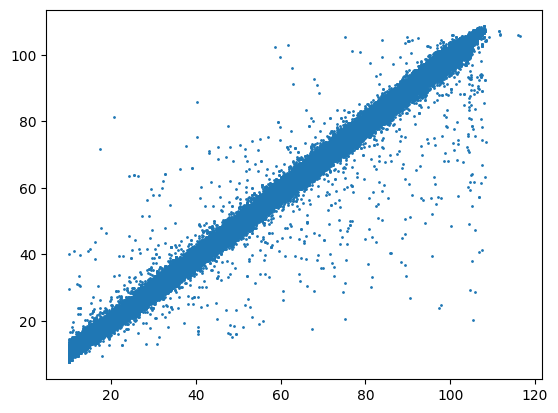

In [18]:
# 创建figure对象
fig = plt.figure()
# 绘制散点图
plt.scatter(Train_results_re[:, 0], Train_results_re[:, 1], s=1)
# 显示散点图
plt.show()

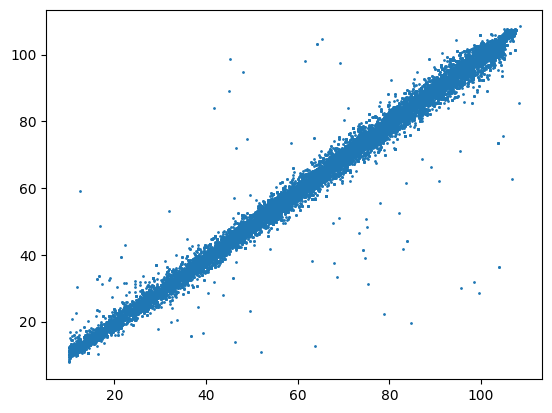

In [19]:
# 创建figure对象
fig = plt.figure()
# 绘制散点图
plt.scatter(Test_results_re[:, 0], Test_results_re[:, 1], s=1)
# 显示散点图
plt.show()